# Poissson Process
$$
P\{ N(t-t_{0}) = n \} = \frac{(\lambda t)^{n}}{n!}e^{-\lambda t}
$$


- The interval time between two event happening is obey to the exponent distribution

$$
f_{X_{i}}(x) = \begin{cases}\lambda e^{-\lambda x}, & x > 0 \\ 0, & x\le 0\end{cases}
$$

In [6]:
using CairoMakie

In [7]:
it2idx(t::Union{SubArray{Float64},Vector{Float64}, Matrix{Float64}}; dt=0.01) = trunc.(Int64, t ./ dt) 
function generate_i_ex(i_num, λ; T=200, dt=0.01, i_interval=0.1)
    t = 0:dt:T |> collect
    intervals = -log.(1 .- rand(i_num, trunc(Int64,T / (1/λ) * 1.2) + 100  )) ./ λ
    i_t = cumsum(intervals, dims=2)
    N::Int64 = i_interval/dt
    start_point = [it2idx(row)[it2idx(row) .< length(t)] for row in eachrow(i_t)]
    iex_time = vcat.(start_point,[start_point .+ i .* ones.(Int64,length.(start_point)) for i in 1:N-1]...)
    i_exs = [zeros(length(t)) for i in 1:i_num]
    idx = Array{Vector{Int64}}(undef, i_num)

    for i in 1:length(i_exs)
        idx[i] =iex_time[i][0 .< iex_time[i] .<= length(t)] 
        i_exs[i][idx[i]] .= 1
    end
    return i_exs
end


generate_i_ex (generic function with 1 method)

In [28]:
iexs = generate_i_ex(1, 0.04)

1-element Vector{Vector{Float64}}:
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

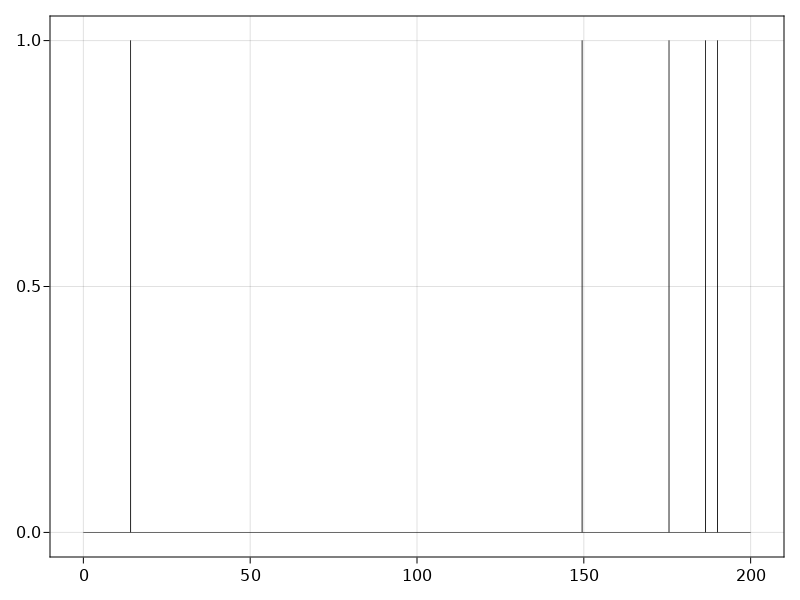

In [29]:
t = collect(0:0.01:200);

lines(t, iexs[1], color=:black, linewidth=0.5,)

In [9]:
hcat([hcat(iex[i]...) for i in 1:length(iex)]...)'

1000×20001 adjoint(::Matrix{Float64}) with eltype Float64:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  1.0  1.0  1.0  1.0  1.0  1.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     1.0  1.0  1.0  1.0  1.0  1.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     1.0  1.0  1.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  1.0  1.0  1.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     1.0  1.0  1.0  1.0  0.0  0.0  0.0
 ⋮                        ⋮              ⋱       ⋮                        ⋮
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0